# Conversión de Clima

## Red Neuronal Simple

Primero cabe explicar que es una Red Neuronal Simple, una red neuronal de por sí, en el campo de la informática, el modelo de neuronas artificiales inspirado en el comportamiento biológico de las neuronas y en cómo se organizan formando la estructura del cerebro. La neurona se divide en: 
● El cuerpo central, llamado soma, que contiene el núcleo celular.
● Una prolongación del soma, el axón. 
● Una ramificación terminal, dendritas.
● Una zona de conexión entre una neurona y otra, conocida como sinápsis.

Aplicado a las neurona artificiales, sería: 
● Un conjunto de entradas x1,…xn.
● Los pesos sinápticos w1,…wn, correspondientes a cada entrada.
● Una función de agregación, Σ.
● Una función de activación, f.
● Una salida.

Una imagen de como se representaría a una red neuronal

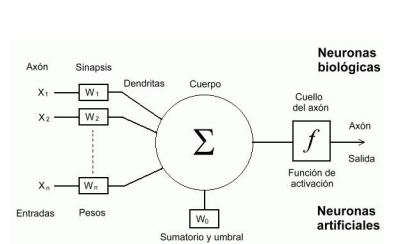

In [14]:
from IPython.display import Image

Image("Red_Neuronal.png", width=400)

## No estamos en una clase de algoritmos y de estadística o Matemática, eso lo dejamos para otro día, ahora veamos como se supone que de eso pasemos a una implementación práctica:

## Conversión de Celsius a Farenheit: 

### Fórmula de la conversión: F=1.8⋅C+32

#### Importemos nuestras herramientas

In [19]:
!pip install tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.32.1 which is incompatible.


   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
    --------------------------------------- 4.5/331.9 MB 26.9 MB/s eta 0:00:13
   - -------------------------------------- 8.9/331.9 MB 22.2 MB/s eta 0:00:15
   - -------------------------------------- 11.0/331.9 MB 18.1 MB/s eta 0:00:18
   -- ------------------------------------- 17.3/331.9 MB 20.6 MB/s eta 0:00:16
   -- ------------------------------------- 21.5/331.9 MB 20.9 MB/s eta 0:00:15
   --- ------------------------------------ 26.2/331.9 MB 21.3 MB/s eta 0:00:15
   --- ------------------------------------ 30.7/331.9 MB 21.2 MB/s eta 0:00:15
   ---- ----------------------------------- 35.1/331.9 MB 21.3 MB/s eta 0:00:14
   ---- ----------------------------------- 38.8/331.9 MB 20.9 MB/s eta 0:00:15
   ----- ---------------------------------- 43.5/331.9 MB 21.1 MB/s eta 0:00:14
   ----- ---------------------------------- 48.0/331.9 MB 21.4 MB/s eta 0:00:14
   ------ --------------------------------- 52.2/33

In [21]:
#Creamos dos arreglos en numpy para que sean nuestros datos de entramiento
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [22]:
# Como es una red simple, tendremos una capa, que procesará los datos entregado en el modelo, y los aprenderá y practicará(posteriormente).
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

C:\Users\USUARIO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
#Hacemos que el modelo compile, se optimice valiendonos del error cuadrático, para saber que tan errado está.
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [24]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


##### Lo que hicimos, aparte de poner a entrenar al modelo, es darle los datos, y que lo haga unas mil veces(epochs:1000)

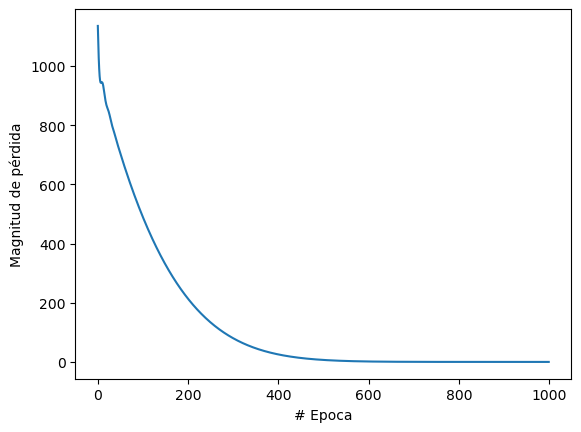

In [25]:
#Ahora veamos como le fue en el entrenamiento, y por cuanto le erró(falló):
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [26]:
#Se puede observar que en la época 500-600 se estabiliza y el error de superar los 1000 llega a 0

In [27]:
#Veamos las variables internas del modelo, como funciona el cálculo:
print("Variables internas del modelo")
print(capa.get_weights())

Variables internas del modelo
[array([[1.7981318]], dtype=float32), array([31.930876], dtype=float32)]


In [28]:
#Recordemos que: la fórmula de Agregación sería la entrada(celsius) x peso(1.7981318)
#Y de la función de activación: (Entrada x peso)+Sesgo(31.930876)
# De ahí las variables internas

In [30]:
print("Hagamos una predicción!")
predecir=np.array([25.0])

resultado = modelo.predict(predecir)
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
El resultado es [[76.88417]] fahrenheit!


# Este fue el proyecto que hice de una Red Neuronal, una Neurona simple, pero básica y para empezar a entender mejor como funcionan las redes